In [43]:
import cv2
from matplotlib import pyplot as plt

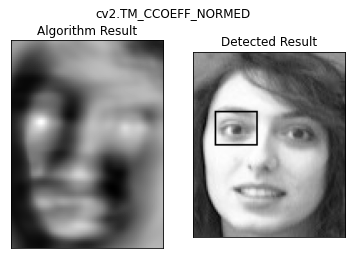

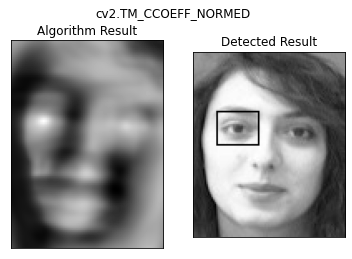

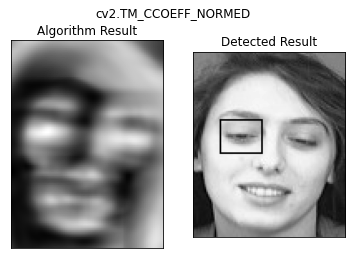

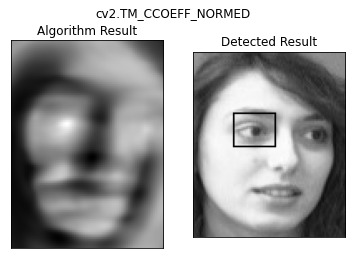

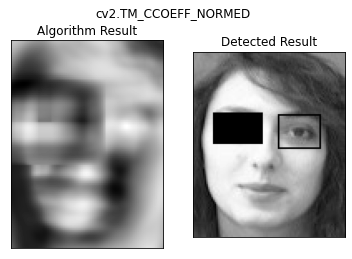

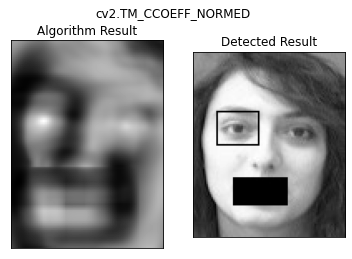

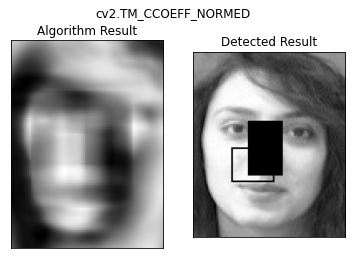

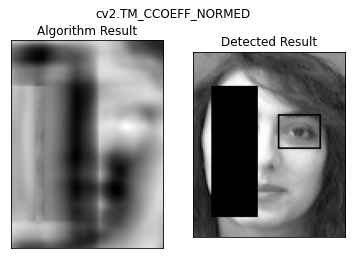

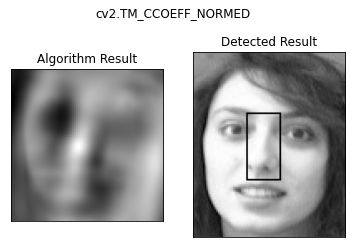

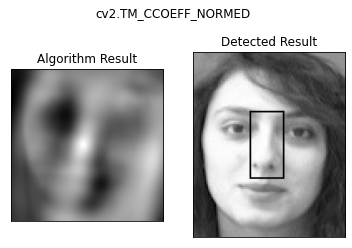

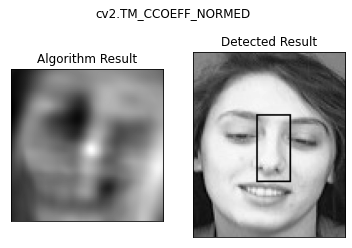

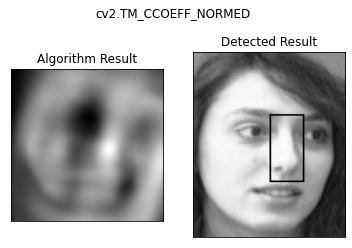

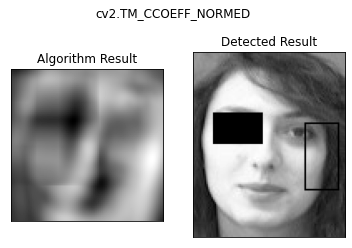

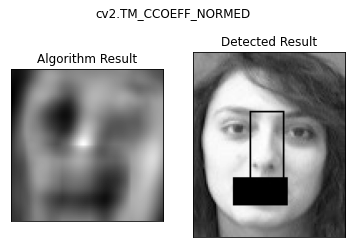

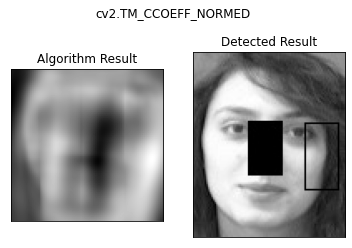

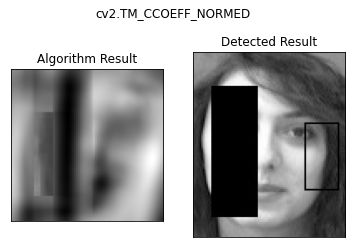

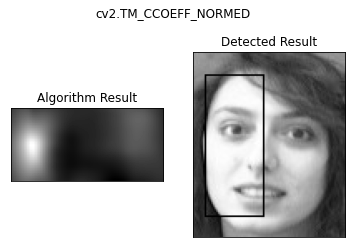

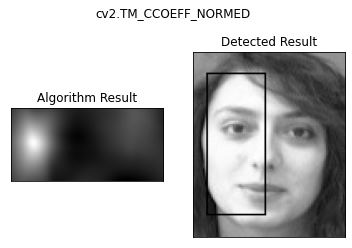

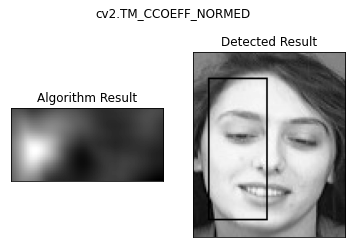

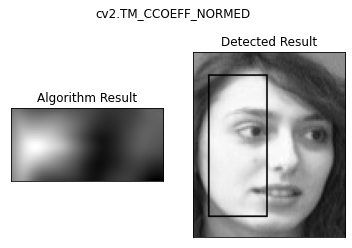

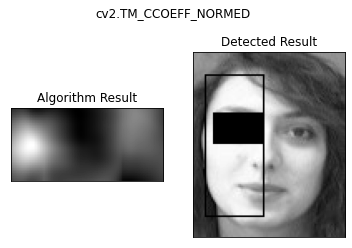

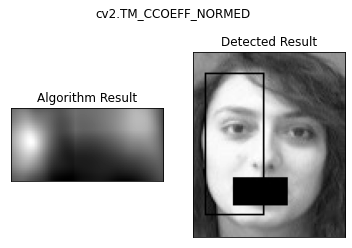

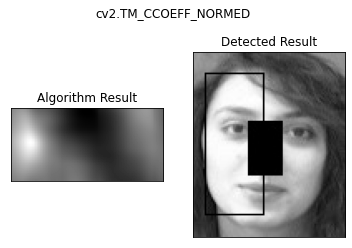

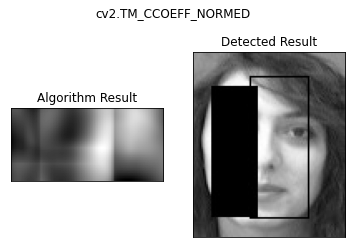

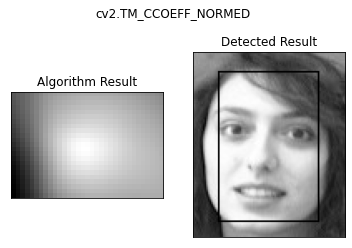

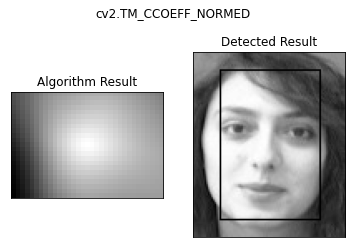

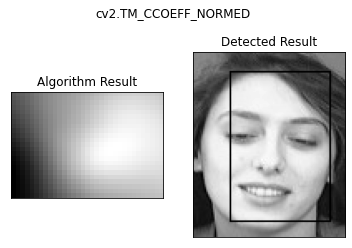

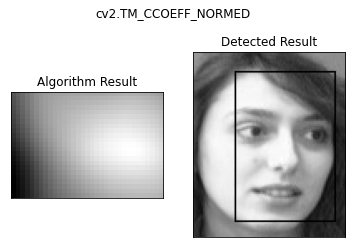

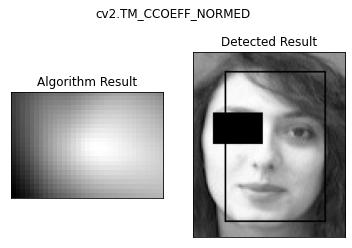

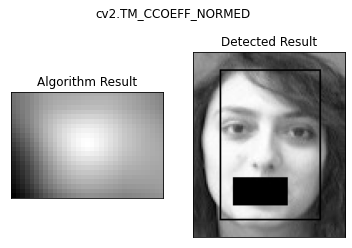

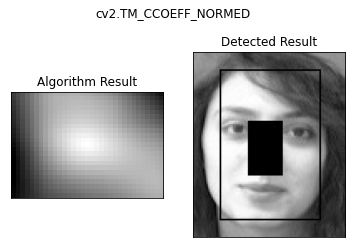

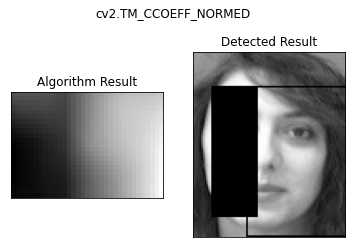

In [44]:
def showResult(result, image, methodName):
    plt.subplot(121)
    plt.imshow(result, cmap = 'gray')
    plt.title('Algorithm Result')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(122)
    plt.imshow(image, cmap = 'gray')
    plt.title('Detected Result')
    plt.xticks([])
    plt.yticks([])
    plt.suptitle(methodName)
    plt.show()

def templateMatching(templateSourse, imageSourse):
    method = eval('cv2.TM_CCOEFF_NORMED')
    image = cv2.imread(imageSourse, cv2.IMREAD_GRAYSCALE)
    template = cv2.imread(templateSourse, cv2.IMREAD_GRAYSCALE)

    result = cv2.matchTemplate(image, template, method)

    _, _, _, top_left = cv2.minMaxLoc(result)
    width, height = template.shape[::-1]
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(image, top_left, bottom_right, 0, 1)
    showResult(result, image, 'cv2.TM_CCOEFF_NORMED')

templates = ['eye.jpg', 'nose.jpg', 'halfFace.jpg', 'face.jpg']
images = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg']

for template in templates:
    for img in images:
        templateMatching(template, img)

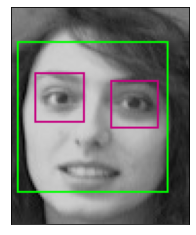

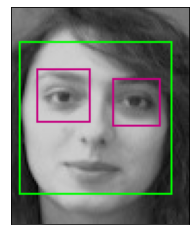

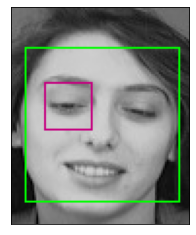

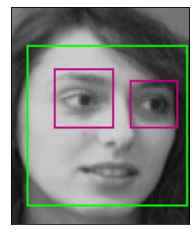

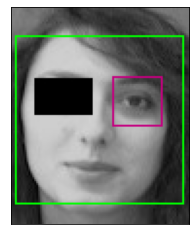

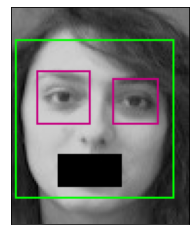

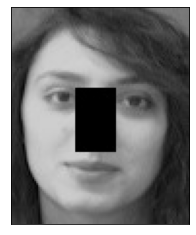

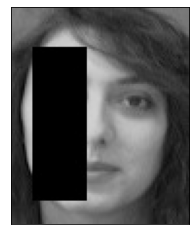

In [45]:
def violaJones(imageSourse):
    image = cv2.imread(imageSourse)
    gray = cv2.cvtColor(image, 7)
    faceСascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eyeСascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    faces = faceСascade.detectMultiScale(gray, 1.1, 6,)

    for x, y, width, height in faces:
        image = cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 1,)

        eyeGray = gray[y: y + height, x: x + width]
        eyeColor = image[y: y + height, x: x + width]

        eyes = eyeСascade.detectMultiScale(eyeGray)

        for eyeX, eyeY, eyeWidth, eyeHeight in eyes:
            cv2.rectangle(eyeColor, (eyeX, eyeY), (eyeX + eyeWidth, eyeY + eyeHeight), (197, 0, 128), 1)

    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

for img in images:
    violaJones(img)

In [46]:
from tkinter import *
from tkinter import ttk

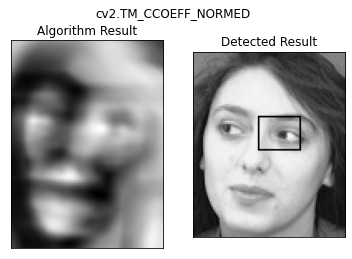

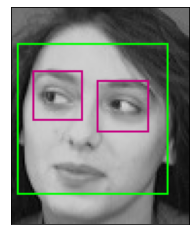

In [47]:
def clickButton():
    if(imageEntry.get()):
        if(methodEntry.get() == "Template Matching" and templateEntry.get()):
            templateMatching(templateEntry.get(), imageEntry.get())
        
        if(methodEntry.get() == "Viola Jones"):
            violaJones(imageEntry.get())    

root = Tk() 
canvas = Canvas(root, width = 500, height = 400, bg = 'white')

methodEntry = ttk.Combobox(root, state='readonly', width = 25, values = ["Template Matching", "Viola Jones"])
methodLabel = Label(text = "Выберете метод", bg = 'white')

imageEntry = Entry(width = 29)
imageLabel = Label(text = "Выберете изображение", bg = 'white')

templateEntry = Entry(width = 29)
templateLabel = Label(text = "Выберете шаблон для поиска", bg = 'white')

selectButton = Button(text = "Задать", command = clickButton)

methodLabel.place(x = 5, y = 5)
methodEntry.place(x = 5, y = 30)

imageLabel.place(x = 5, y = 75)
imageEntry.place(x = 5, y = 100)

templateLabel.place(x = 5, y = 145)
templateEntry.place(x = 5, y = 170)
selectButton.place(x = 70, y = 200)

canvas.pack()
root.mainloop()